## Exercise 2

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
eval_files = os.listdir("eval/")
ids_files = [f.split(".")[0] for f in eval_files]

In [3]:
ids_files[:5]
id_arr = np.array(ids_files)

In [4]:
#result = pd.DataFrame(dict(Id=id_arr,Predicted = y_pred))

In [5]:
import re
dev_files = os.listdir("dev/")
dev_ids = [f.split("_")[0] for f in dev_files]
dev_labels = [re.split("\.|_", f)[1] for f in dev_files]
dev_files[:5]

['0_4.wav', '1000_0.wav', '1001_1.wav', '1002_6.wav', '1003_2.wav']

In [6]:
import scipy.io.wavfile as wav
sample_rate, data = wav.read("dev/"+dev_files[5])
data[:100]

array([-448, -478,  630, -214,  -23,  893,    2,   33,  341, -160, -227,
        -72,  -31, -213, -207,  116, -212, -167,    0,    9,  -83,   60,
         72,   82,  -56,  208,  134,   63,   79,  227,   90,    1,  112,
        -40, -108,  -98,  -67,  -95, -399,   99, -692, -733,  361, -406,
        -84,  519,   45,  626,  728,  300,  814, -129,   82,  502, -712,
       -109,  319, -581, -216,  488, -508, -451,   77, -368, -528,   29,
       -110, -524,  167,  208,  153,  303,  783,  182,  282,  431,   21,
        -59,  -25, -370, -351, -321, -493, -193, -373, -210,  121,  207,
         88,  281,  447,  154,  246,  421,  -41, -228,  202, -217, -248,
        123], dtype=int16)

In [7]:
type(data)
lenght = data.shape[0]/sample_rate
lenght

0.493125

• what do these numbers represent?
 *sample_rate*: represent the number of samples per second, usually known as Hertz[Hz]. In this case, each file has 8000Hz  *data*: with those numbers given there, you can recreate the original wave (up to a limited quality, of course, but that's always so when storing stuff digitally);
     
• were the audios recorded under the same conditions? (e.g. recording volume, noise, etc.)

• do the arrays have an equal length? How different lengths could impact on your pre-processing
solution? If it was needed, could you figure a way out to align them to the same length?


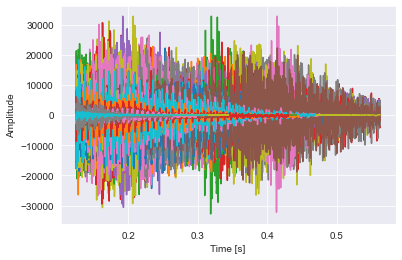

In [181]:
dev_audio = [wav.read("dev/"+f) for f in dev_files ]

sns.set_style("darkgrid")
length_list = []
times = []
padded_data = []
for rate, data in dev_audio:
    length = data.shape[0]/rate
    length_list.append(length)
    time = np.linspace(0., length, data.shape[0])
    times.append(time)
    plt.plot(time[1000:4500], data[1000:4500])
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    if data.shape[0] <5000:
        data = ((np.pad(data, (0, 5000-len(data)), constant_values = (0, np.mean(data)))))
        padded_data.append(data[:4000])
    else:
        padded_data.append(data[200:4000])
        
   

In [74]:
times[0].shape

(3124,)

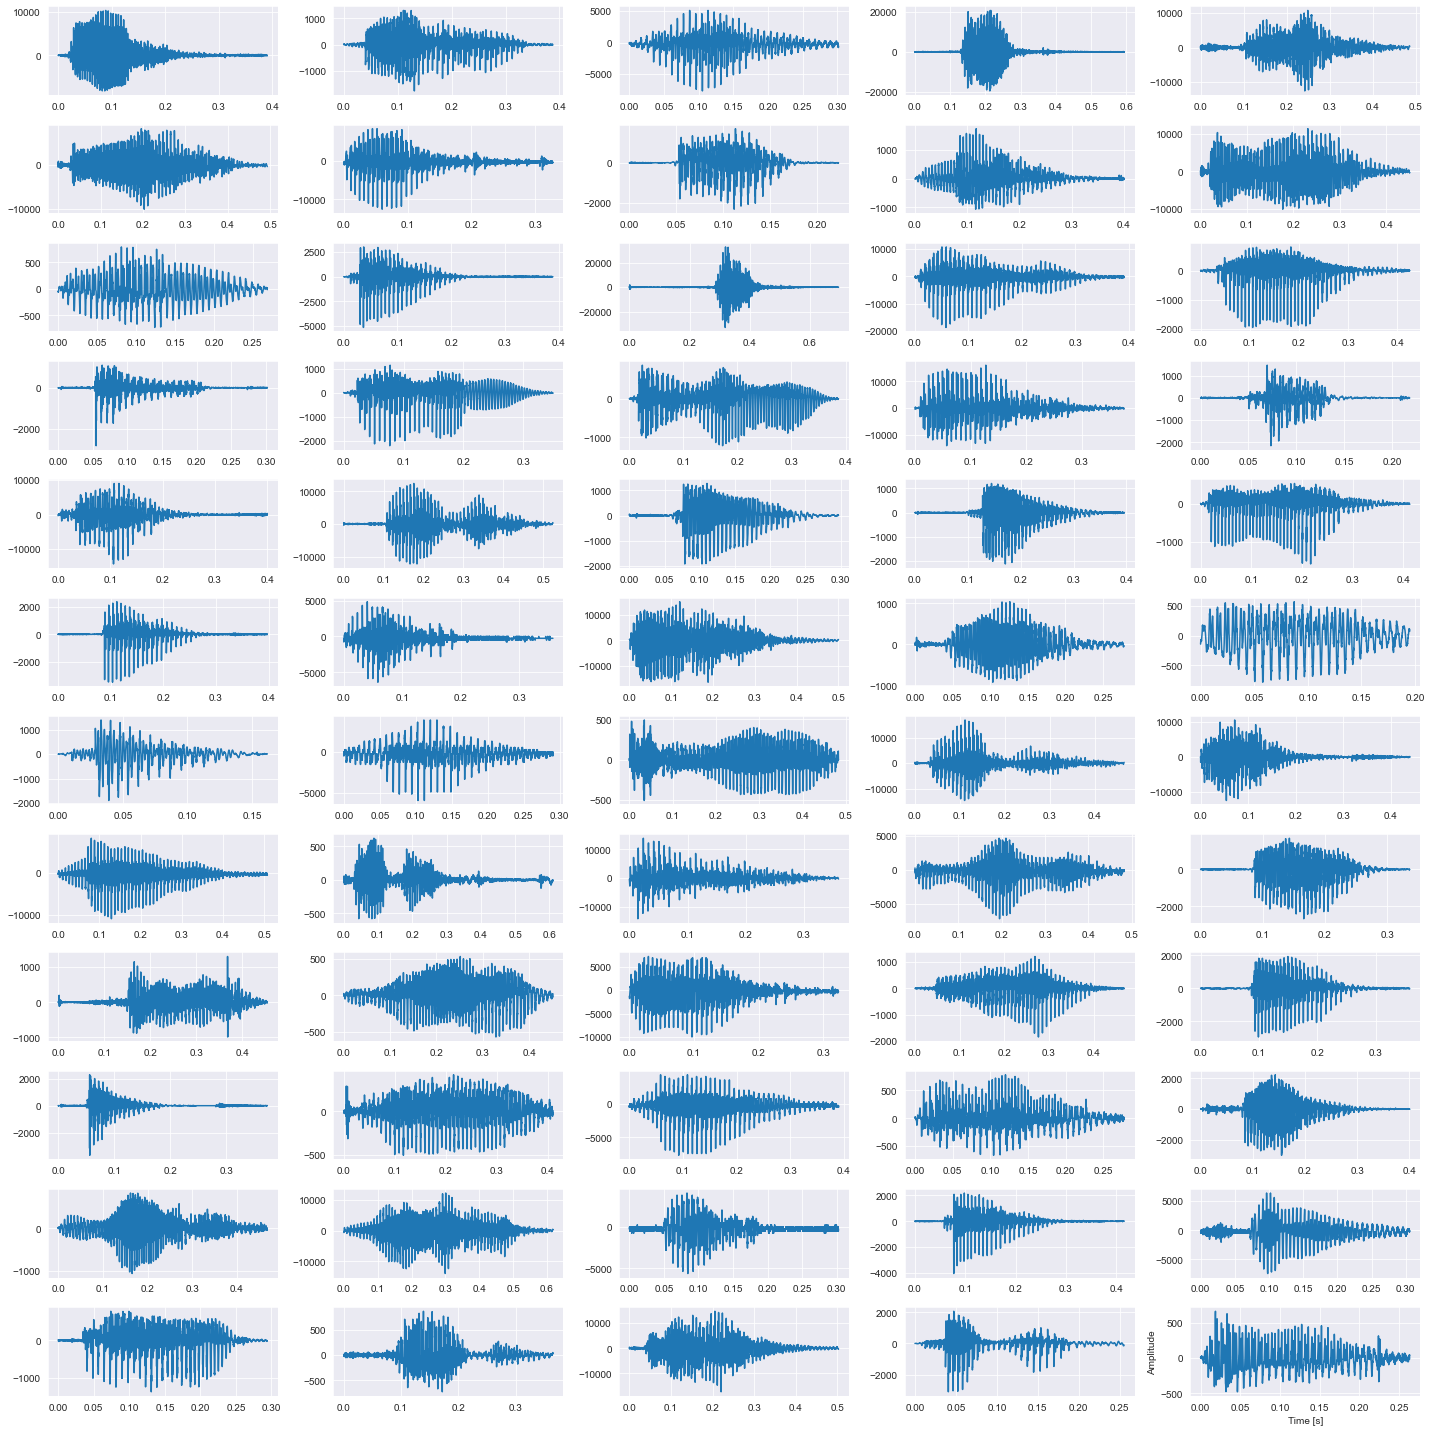

In [75]:

x = np.linspace(1,1500, 1500).astype(int)
fig, ax = plt.subplots(12,5, figsize= [20,20])
#padded_data = []
for j in range(12):
    for i, (rate, data) in enumerate(dev_audio[j*5:5+j*5]):
        length = data.shape[0]/rate
        length_list.append(length)
        time = np.linspace(0., length, data.shape[0])
        times.append(time)
        ax[j,i].plot(time, data)
        
       

plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

In [118]:
dataframe = pd.DataFrame(padded_data).astype(float)

In [119]:
dataframe

,0,1,2,3,4,5,6,7,8,9,...,3790,3791,3792,3793,3794,3795,3796,3797,3798,3799
0,235.0,-90.0,-345.0,-573.0,-749.0,-721.0,-605.0,-525.0,15.0,826.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,10.0,29.0,40.0,45.0,47.0,62.0,49.0,58.0,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,768.0,1024.0,768.0,1024.0,512.0,512.0,256.0,-256.0,-768.0,-768.0,...,-231.0,-231.0,-231.0,-231.0,-231.0,-231.0,-231.0,-231.0,-231.0,-231.0
3,31.0,-30.0,-52.0,-53.0,-62.0,-62.0,-13.0,-68.0,5.0,-41.0,...,-17.0,26.0,-31.0,100.0,-35.0,-50.0,11.0,-22.0,72.0,-87.0
4,-268.0,136.0,900.0,218.0,-485.0,249.0,-12.0,-384.0,-391.0,-267.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-512.0,0.0,-256.0,-256.0,-256.0,-512.0,-256.0,-512.0,-256.0,-256.0,...,-228.0,-228.0,-228.0,-228.0,-228.0,-228.0,-228.0,-228.0,-228.0,-228.0
1496,0.0,-256.0,-256.0,-512.0,0.0,0.0,-512.0,-256.0,-256.0,-256.0,...,-232.0,-232.0,-232.0,-232.0,-232.0,-232.0,-232.0,-232.0,-232.0,-232.0
1497,-256.0,-512.0,-256.0,-512.0,0.0,-768.0,256.0,-512.0,-256.0,-256.0,...,-230.0,-230.0,-230.0,-230.0,-230.0,-230.0,-230.0,-230.0,-230.0,-230.0
1498,67.0,13.0,92.0,24.0,25.0,25.0,2.0,8.0,31.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
test_data = []
eval_audio = [wav.read("eval/"+ f) for f in eval_files]
for rate, data in eval_audio:
    if data.shape[0] <5000:
        data = (np.pad(data, (0, 5000-len(data)), constant_values = (0, np.mean(data))))
        test_data.append(data[200:4000])
    else:
        test_data.append(data[200:4000])

In [117]:
test_df = pd.DataFrame(test_data).astype(float)

In [120]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,3790,3791,3792,3793,3794,3795,3796,3797,3798,3799
0,0.0,-256.0,-256.0,-512.0,0.0,0.0,-256.0,-768.0,-512.0,-256.0,...,-233.0,-233.0,-233.0,-233.0,-233.0,-233.0,-233.0,-233.0,-233.0,-233.0
1,-294.0,-196.0,-194.0,-96.0,28.0,128.0,292.0,338.0,404.0,461.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,-256.0,-256.0,0.0,0.0,-256.0,0.0,-256.0,-256.0,-256.0,...,-230.0,-230.0,-230.0,-230.0,-230.0,-230.0,-230.0,-230.0,-230.0,-230.0
3,-512.0,-768.0,-512.0,-768.0,-768.0,-1024.0,-768.0,-1024.0,-768.0,-1024.0,...,-252.0,-252.0,-252.0,-252.0,-252.0,-252.0,-252.0,-252.0,-252.0,-252.0
4,824.0,1442.0,1626.0,1448.0,858.0,560.0,195.0,275.0,610.0,851.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-129.0,278.0,-50.0,179.0,65.0,-199.0,161.0,-260.0,507.0,-671.0,...,-648.0,-698.0,-719.0,-625.0,-530.0,-557.0,-525.0,-484.0,-376.0,-286.0
496,2.0,-12.0,-1.0,-15.0,25.0,-21.0,-6.0,15.0,7.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,-58.0,-48.0,-4.0,-11.0,-38.0,-75.0,-153.0,-221.0,-336.0,-402.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,266.0,-3.0,-43.0,-112.0,-336.0,-450.0,-463.0,-596.0,-742.0,-638.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [134]:
import numpy.fft as ft

In [165]:
train_fft = []

for rate, data in dev_audio:
    if data.shape[0] <5000:
        data = (np.pad(data, (0, 5000-len(data)), constant_values = (0, np.mean(data))))
        train_fft.append(np.fft.fft(data[800:4000]))
    else:
        train_fft.append(np.fft.fft(data[800:4000]))
    

In [166]:
test_fft = []
eval_audio = [wav.read("eval/"+ f) for f in eval_files]
for rate, data in eval_audio:
    if data.shape[0] <5000:
        data = (np.pad(data, (0, 5000-len(data)), constant_values = (0, np.mean(data))))
        test_fft.append(np.fft.fft(data[800:4000]))
    else:
        test_fft.append(np.fft.fft(data[800:4000]))
    

(5000,)

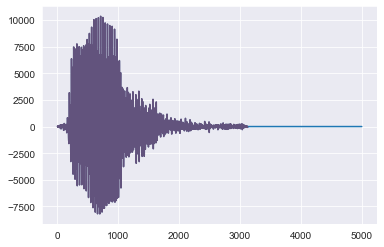

In [64]:
rate, data = dev_audio[0]

y = np.pad(data, (0, 5000-data.shape[0]), constant_values = (0, np.mean(data)))
plt.plot(y)

plt.plot(data, color = 'r', alpha = 0.3)
y.shape

We can see that there is a certain outliers, so it'a rumor. Now I take only the value <1s


In [ ]:
denoised = array[array<1]
denoised[:5]

In [ ]:
plt.hist(denoised)

In [62]:
np.zeros(5000).shape

(5000,)

In [58]:
x = np.array([1,2,3])
y = np.array([11,12,13])
z = np.array([4,5,6])
r = np.vstack((x,y))
r.shape

(2, 3)

In [ ]:
n_partitions = 20

chunks[chunks<2300]

In [ ]:
type(chunks)
chunks[1]

In [ ]:

cols[:9]

In [ ]:
chunks[1]


### Define function create_df


In [ ]:
def create_df(n_partitions, init_point, end_point, audio_files):   
    
    chunks = np.linspace(init_point, end_point , n_partitions).astype(int)
    cols = [str(chunks[i])+"-"+str(chunks[i+1]) for i in range(len(chunks)-1) ]
    
    df = pd.DataFrame(columns = cols )

    for j, (rate, data) in enumerate(audio_files):
        upper_limit = min(data.shape[0], end_point)
        lower = 0
        d_chunks = chunks[chunks<upper_limit]

        values = {}
        for i in range(len(d_chunks)):
            masked_data = (data[chunks[i]: chunks[i+1]])
            values[df.columns[i]] = masked_data.mean()

        df = df.append(values, ignore_index= True)
    
    return df


### Create 3 df with different size

In [ ]:
df = create_df(20, 0,8000, dev_audio)

In [ ]:
df2 = create_df(20,0,8000*0.75, dev_audio)

In [ ]:
df3 = create_df(20, 0, 8000*0.5, dev_audio)

In [ ]:
df4 = create_df(10, 1000, 4000, dev_audio)

In [ ]:
df4.shape

## Plot NaN values and get cols with more than 80% 

In [ ]:
count = df.count() #count non NaN values for each column
count2 =  df2.count()
count3 = df3.count()

fig, ax = plt.subplots(1,3, figsize = [10,10])

plt.xlabel("Chunks")
plt.ylabel("Numbers of none NaN values")
ax[0].bar(cols, count)
ax[1].bar(df2.columns,count2 )
ax[2].bar(df3.columns[count3>1200],count3[count3>1200])
plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()



In [ ]:
plt.xlabel("Chunks")
plt.ylabel("Numbers of none NaN values")
plt.bar(df4.columns, df4.count())
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df4.shape

df4

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
clf = DecisionTreeClassifier()

clf.fit(df.iloc[:,:-1], df.iloc[:,[-1]])

In [ ]:
df_test = pd.DataFrame(columns = df4.columns )

eval_audio = [wav.read("eval/"+ f) for f in eval_files]

for j, (rate, data) in enumerate(eval_audio):
    upper_limit = min(data.shape[0], 8000)
    lower = 0
    d_chunks = chunks[chunks<upper_limit]
    
    values = {}
    for i in range(len(d_chunks)-1):
        masked_data = (data[chunks[i]: chunks[i+1]])
        values[df.columns[i]] = masked_data.mean()
    
    df_test = df_test.append(values, ignore_index= True)
    

In [ ]:
df2 = df2.fillna(0)

In [ ]:
y_pred = clf.predict(df2.iloc[:,:])

In [ ]:
idx_pred = [f.split(".")[0]  for f in eval_files]

In [ ]:
len(idx_pred)

In [ ]:
result = pd.DataFrame(dict(Id=idx_pred, Predicted= y_pred), index= None)
result.to_csv("random_submission.csv", index = False)

### Classifier for df4

In [85]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

In [87]:
df_train = df4.fillna(0)
y_train = np.array(dev_labels)
#create test set
df_test = create_df(10,1000,4000, eval_audio)
df_test = df_test.fillna(0)

df_test

NameError: name 'df4' is not defined

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(df_train, y_train)
y_pred_dt = clf.predict(df_test)

knn_clf = KNeighborsClassifier(n_neighbors=10)
knn_clf.fit(df_train,y_train)
y_pred_knn = knn_clf.predict(df_test)

classifier = RandomForestClassifier()
classifier.fit(df_train, y_train)
y_pred_rf =  classifier.predict(df_test)


In [ ]:
data = {}
data["KNN"] = y_pred_knn
data['DT'] = y_pred_dt
data['RF'] = y_pred_rf
confronto = pd.DataFrame(data )
confronto

In [ ]:
result = pd.DataFrame(dict(Id=idx_pred,Predicted=y_pred_knn))
result.to_csv("knn_trimmed_result.csv", sep=",", index = False )

In [ ]:
result = pd.DataFrame(dict(Id=idx_pred,Predicted=y_pred_dt))
result.to_csv("dt_trimmed_result.csv", sep=",", index = False )

In [ ]:
result = pd.DataFrame(dict(Id=idx_pred,Predicted=y_pred_rf))
result.to_csv("rf_trimmed_result.csv", sep=",", index = False )

In [110]:
y_train = np.array(dev_labels)
classifier = RandomForestClassifier()
classifier.fit(dataframe, y_train)
y_pred_rfPad =  classifier.predict(test_data)



In [111]:
idx_pred = [f.split(".")[0] for f in eval_files]

In [121]:
res = pd.DataFrame(dict(Id=idx_pred, Predicted= y_pred_rfPad))
res.to_csv("prova_padd_200_4000.csv", sep=",", index=False)

In [122]:
y_pred_rfPad.shape

(500,)

In [130]:
knn_clf = KNeighborsClassifier(n_neighbors=100)
knn_clf.fit(dataframe,y_train)
y_pred_knn = knn_clf.predict(test_data)


In [131]:
res = pd.DataFrame(dict(Id=idx_pred, Predicted= y_pred_knn))
res.to_csv("knn_padd_200_4000.csv", sep=",", index=False)

In [156]:
prova = pd.DataFrame([[1,2,3],[-1,3,-4], [1,3,-5]])
prova.abs()

,0,1,2
0,1,2,3
1,1,3,4
2,1,3,5


In [167]:
train_df = pd.DataFrame(train_fft)
test_df = pd.DataFrame(test_fft)

In [168]:
train_df = train_df.abs()
test_df = test_df.abs()

(1500, 4000)

In [170]:


y_train = np.array(dev_labels)
classifier = RandomForestClassifier()
classifier.fit(train_df, y_train)
y_pred_rfPad =  classifier.predict(test_df)

In [171]:
res = pd.DataFrame(dict(Id=idx_pred, Predicted= y_pred_rfPad))
res.to_csv("prova_ffT_0_4000.csv", sep=",", index=False)